In [ ]:
pip install composition_stats

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for composition-stats: filename=composition_stats-1.1.0-py3-none-any.whl size=13745 sha256=36b85fc2400df04d32554fb011d21280d420f4f50975bc65597a49b7b0953a51
  Stored in directory: /root/.cache/pip/wheels/a5/36/b9/87081163b88e46bd21b4612d6e4b849d3d2157190872e4456f
Successfully built composition-stats


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FishMorphology.csv to FishMorphology.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import composition_stats as coda
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import io
  
df = pd.read_csv(io.BytesIO(uploaded['FishMorphology.csv']))
X0 = df[["Hw",	"Bg",	"Bd",	"Bcw",	"Jw",	"Jl",	"Bp",	"Bac",	"Bch",	"Fc",	"Fdw",	"Faw",	"Bc",	"Fp",	"Fpl",	"Fal",	"Fdl",	"Hh",	"Hg",	"Ba",	"Jm",	"Hal",	"Hpl",	"Ed",	"Hs",	"Hl"]]
y0 = df[["Mass"]]
X1 = X0.to_numpy()
X = X1/X1.sum(axis=1)[:, None]
y = y0.to_numpy().reshape(-1)
# transform X using ilr transformation method
X_new = coda.ilr(X)

In [ ]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.05, random_state=121)

In [ ]:
# Create linear regression object
Model = linear_model.LinearRegression()

# Train the model using the training sets
Model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = Model.predict(X_test)


In [ ]:
# The coefficients
print('Coefficients: \n', Model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(Model.score(X_test, y_test)))
 

Coefficients: 
 [ 105.97818286  -12.73028127  -95.81246848  133.41879637  -57.36917325
  144.37883641  111.33075176   86.4924169     9.85077977  170.23650406
  -28.02168637  121.09207016 -186.09097743   17.22353518   18.49135253
  188.1321651   105.91293817  -74.63130567  103.43791737   26.9301217
 -100.44426178  -30.27547667  -68.80233503  402.04862243 -281.8679071 ]
Variance score: 0.7782850996150148


In [ ]:
metrics.explained_variance_score(y_test, y_pred)

0.9642435163675586

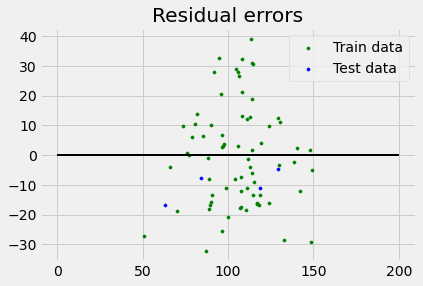

In [ ]:

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(Model.predict(X_train), Model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(Model.predict(X_test), Model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 200, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


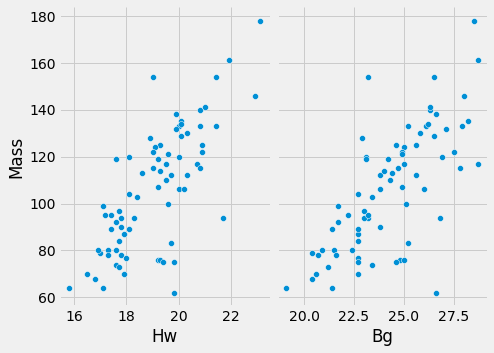

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=[ "Hw",	"Bg",], y_vars='Mass', size=5, aspect=0.7)
